# Ignore tha warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read Dataset

In [9]:
churn_df=pd.read_csv('churn_data.csv')

In [10]:
internet_df=pd.read_csv('internet_data.csv')

In [11]:
customer_data=pd.read_csv('customer_data.csv')

In [12]:
df= pd.merge(internet_df,churn_df,on='customerID')

In [13]:
df=pd.merge(df,customer_data, on='customerID')

# Check all properties of dataset

In [15]:
df.shape

(7043, 21)

## Info

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
dtypes: float64(1), int64(2), obj

In [21]:
df1=df.drop('customerID',1) # Because customer ID is unique column

In [23]:
df1.isnull().sum() # no null values are there

MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
dtype: int64

In [30]:
np.dtype(df1.TotalCharges)

dtype('O')

In [33]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges,errors='coerc')

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [65]:
df1.skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
SeniorCitizen     1.833633
dtype: float64

# Define feature and target

In [35]:
X=df1.drop('Churn',1)

In [36]:
y=df1.Churn

In [38]:
X.shape

(7043, 19)

# Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [41]:
df1.columns

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents'],
      dtype='object')

In [59]:
discrit_cols=X.columns[X.dtypes==object].tolist()

In [60]:
discrit_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'gender',
 'Partner',
 'Dependents']

In [61]:
X[discrit_cols]=X[discrit_cols].apply(lambda col:le.fit_transform(col))

In [62]:
X.head()

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents
0,1,0,0,2,0,0,0,0,1,0,0,1,2,29.85,29.85,0,0,1,0
1,0,0,2,0,2,0,0,0,34,1,1,0,3,56.95,1889.50,1,0,0,0
2,0,0,2,2,0,0,0,0,2,1,0,1,3,53.85,108.15,1,0,0,0
3,1,0,2,0,2,2,0,0,45,0,1,0,0,42.30,1840.75,1,0,0,0
4,0,1,0,0,0,0,0,0,2,1,0,1,2,70.70,151.65,0,0,0,0


In [88]:
X.isnull().sum()

MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
dtype: int64

In [90]:
X=X.fillna(value=X.TotalCharges.mean())

In [91]:
discrit_cols.insert(-2,'SeniorCitizen')

In [92]:
discrit_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'gender',
 'SeniorCitizen',
 'SeniorCitizen',
 'Partner',
 'Dependents']

# Spliting

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

# Scaling


In [95]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [96]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [97]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

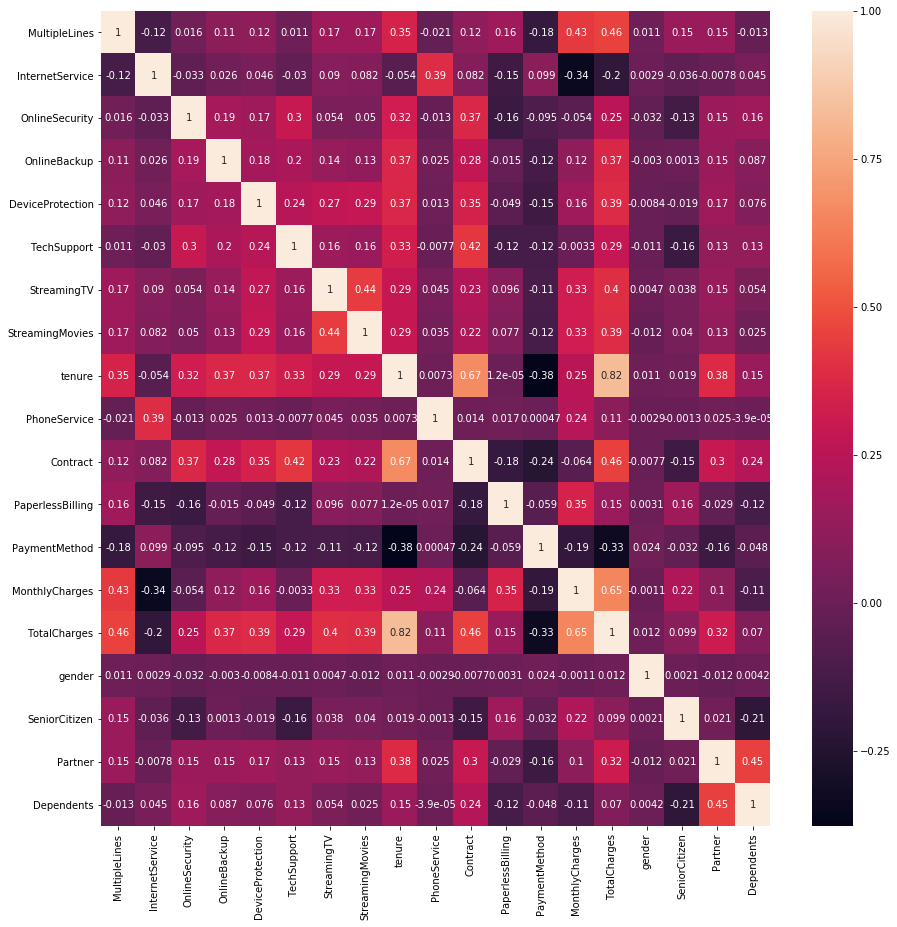

In [98]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train_scaled.corr(),annot=True)

# Analysis

In [99]:
X_train_scaled.isnull().sum()

MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
dtype: int64

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
lgr_model=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=50)
svm_clf=SVC()
dt_gini_clf=DecisionTreeClassifier(criterion='gini')
dt_ent_clf=DecisionTreeClassifier(criterion='entropy')
rf_clf=RandomForestClassifier(n_estimators=500)
xgb_clf=XGBClassifier()
adb_clf=AdaBoostClassifier()

In [101]:
lgr_model.fit(X_train_scaled,y_train)
knn_clf.fit(X_train_scaled,y_train)
svm_clf.fit(X_train_scaled,y_train)
dt_gini_clf.fit(X_train_scaled,y_train)
dt_ent_clf.fit(X_train_scaled,y_train)
rf_clf.fit(X_train_scaled,y_train)
xgb_clf.fit(X_train_scaled,y_train)
adb_clf.fit(X_train_scaled,y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [109]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [117]:
lgr_model_pred=lgr_model.predict(X_test_scaled)
knn_clf_pred=knn_clf.predict(X_test_scaled)
svm_clf_pred=svm_clf.predict(X_test_scaled)
dt_gini_clf_pred=dt_gini_clf.predict(X_test_scaled)
dt_ent_clf_pred=dt_ent_clf.predict(X_test_scaled)
rf_clf_pred=rf_clf.predict(X_test_scaled)
xgb_clf_pred=xgb_clf.predict(X_test_scaled)
adb_clf_pred=adb_clf.predict(X_test_scaled)


In [118]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score,roc_curve,roc_auc_score,auc
acc_scores=[]
rcl_scores=[]
prc_scores=[]
f1_score=[]
auc=[]

In [121]:
acc_scores.append(accuracy_score(y_test,lgr_model_pred))
acc_scores.append(accuracy_score(y_test,knn_clf_pred))
acc_scores.append(accuracy_score(y_test,svm_clf_pred))
acc_scores.append(accuracy_score(y_test,dt_gini_clf_pred))
acc_scores.append(accuracy_score(y_test,dt_ent_clf_pred))
acc_scores.append(accuracy_score(y_test,rf_clf_pred))
acc_scores.append(accuracy_score(y_test,xgb_clf_pred))
acc_scores.append(accuracy_score(y_test,adb_clf_pred))

rcl_scores.append(recall_score(y_test,lgr_model_pred))
rcl_scores.append(recall_score(y_test,knn_clf_pred))
rcl_scores.append(recall_score(y_test,svm_clf_pred))
rcl_scores.append(recall_score(y_test,dt_gini_clf_pred))
rcl_scores.append(recall_score(y_test,dt_ent_clf_pred))
rcl_scores.append(recall_score(y_test,rf_clf_pred))
rcl_scores.append(recall_score(y_test,xgb_clf_pred))
rcl_scores.append(recall_score(y_test,adb_clf_pred))

prc_scores.append(precision_score(y_test,lgr_model_pred))
prc_scores.append(precision_score(y_test,knn_clf_pred))
prc_scores.append(precision_score(y_test,svm_clf_pred))
prc_scores.append(precision_score(y_test,dt_gini_clf_pred))
prc_scores.append(precision_score(y_test,dt_ent_clf_pred))
prc_scores.append(precision_score(y_test,rf_clf_pred))
prc_scores.append(precision_score(y_test,xgb_clf_pred))
prc_scores.append(precision_score(y_test,adb_clf_pred))

f1_score.append(f1_score(y_test,lgr_model_pred))
f1_score.append(f1_score(y_test,knn_clf_pred))
f1_score.append(f1_score(y_test,svm_clf_pred))
f1_score.append(f1_score(y_test,dt_gini_clf_pred))
f1_score.append(f1_score(y_test,dt_ent_clf_pred))
f1_score.append(f1_score(y_test,rf_clf_pred))
f1_score.append(f1_score(y_test,xgb_clf_pred))
f1_score.append(f1_score(y_test,adb_clf_pred))

auc.append(auc(y_test,lgr_model_pred))
auc.append(auc(y_test,knn_clf_pred))
auc.append(auc(y_test,svm_clf_pred))
auc.append(auc(y_test,dt_gini_clf_pred))
auc.append(auc(y_test,dt_ent_clf_pred))
auc.append(auc(y_test,rf_clf_pred))
auc.append(auc(y_test,xgb_clf_pred))
auc.append(auc(y_test,adb_clf_pred))



ValueError: pos_label=1 is not a valid label: array(['No', 'Yes'], dtype='<U3')

In [122]:
acc_scores

[0.7860861334595362,
 0.77520113582584,
 0.7832465688594415,
 0.7311878845243729,
 0.7292948414576431,
 0.7846663511594889,
 0.7884524372929484,
 0.7931850449597728]

In [123]:
rcl_scores

[]

In [119]:
result= pd.DataFrame({'Accuracy Score':acc_scores,
                     'AUC':auc,
                     'Recall':rcl_scores,
                     'Precision':prc_scores,
                     'f1_score':f1_score})

In [120]:
result

,Accuracy Score,AUC,Recall,Precision,f1_score
